# VOLTMETRO

OBIETTIVO: stimare la resistenza interna del voltmetro

PROCEDIMENTO: usando resistenze dell'ordine dei MΩ misuriamo la corrente di una resistenza equivalente data da $R_{eq} = \frac{R_v R}{Rv + R}$

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'voltmetro.csv'
fr = pd.read_csv(FILE)

R = np.array(fr['R(MOHM)']) * 10**6 #megaOHM # - 0.2 ohm non necessario
sigmaRpercent = 0.03 # 1%
sigmaR = R*sigmaRpercent

I = np.array(fr['uA']) * 10**-6 #microAmpere
sigmaIpercent = 0.01 # 1%
sigmaI = I*sigmaIpercent

V = 5.01 # mantenuta costante
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

In [3]:
def final_val(x,sigma,decimals = 2,exp = 0, udm: str = '') -> str:
    x = np.round(x*np.power(10.0,-exp),decimals)
    sigma = np.round(sigma*np.power(10.0,-exp),decimals)
    return f'{x} ± {sigma} {udm}' if exp == 0 else f'({x} ± {sigma})e{exp} {udm}'

### stima e propagazione dell'errore

In [4]:
Rv = (I/V - 1/R)**-1
sigmaRv = np.abs(I/V - 1/R)**-1 * np.sqrt((sigmaI/V)**2 + (I*sigmaV/(V**2)**2) + (sigmaR/(R**2))**2)

N = len(Rv)

avg_Rv = np.average(Rv,weights=1/(sigmaRv**2))
sigma_avg_Rv = np.sqrt(np.sum((Rv - avg_Rv)**2)/(N-1))

In [5]:
print('Rv: ',final_val(avg_Rv,sigma_avg_Rv,exp=6,udm='Ω'))

Rv:  (10.85 ± 0.17)e6 Ω


# RAPPRESENTAZIONE GRAFICA INPUT

In [6]:
R = np.array(fr['R(MOHM)']) #megaOHM # - 0.2 ohm non necessario
sigmaRpercent = 0.03
sigmaR = R*sigmaRpercent

I = np.array(fr['uA']) #microAmpere
sigmaIpercent = 0.01 # 1%
sigmaI = I*sigmaIpercent

V = 5.01 # mantenuta costante
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

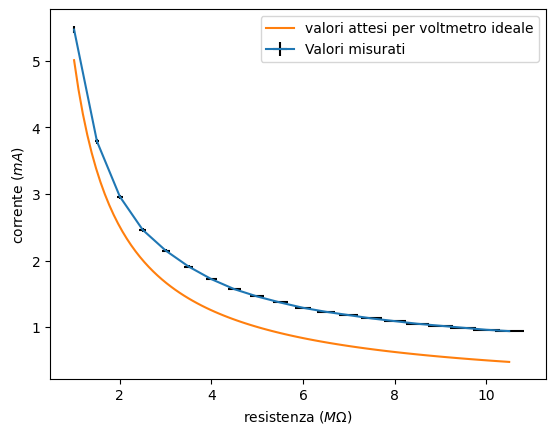

In [7]:
plt.errorbar(R,I,xerr=sigmaR,yerr=sigmaI,label='Valori misurati',ecolor='black')
r = np.linspace(min(R),max(R),100)
Iatt = V/r
plt.plot(r,Iatt,label='valori attesi per voltmetro ideale')
plt.ylabel('corrente ($mA$)')
plt.xlabel('resistenza ($M\Omega$)')
plt.legend()
plt.show()